# Módulo 3 - Ejercicio Evaluación Final

## Fase 2 - Análisis y Visualización

In [1]:
# -----------------------------------------------------------------------
# IMPORTS
# -----------------------------------------------------------------------
# Tratamiento de datos
# -------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# -------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# -------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -------------------------------------------------
pd.set_option('display.max_columns', None)      # Para visualizar todas las columnas de los DataFrames.
pd.set_option('display.max_colwidth', None)     # Para ver todo el contenido de las columnas.

# Gestión de los warnings
# -------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importaciones funciones propias
# -------------------------------------------------
from src import soporte_eda as sp_eda
from src import soporte_correlacion as sp_corr

### Carga de datos archivo df_completo.csv:

In [2]:
# Este archivo es el resultado final de la Extracción y Limpieza de las dos bbdd originales analizadas en la Fase 1.
# Lanzar la última celda del archivo Fase1_EDA_ETL.ipynb para obtenerlo.
# Contiene información sobre la actividad de vuelo de los clientes con un perfil detallado de dichos clientes.

df = pd.read_csv("files/customer_summary.csv")
df.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,66937.5,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,66937.5,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN


Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:  

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

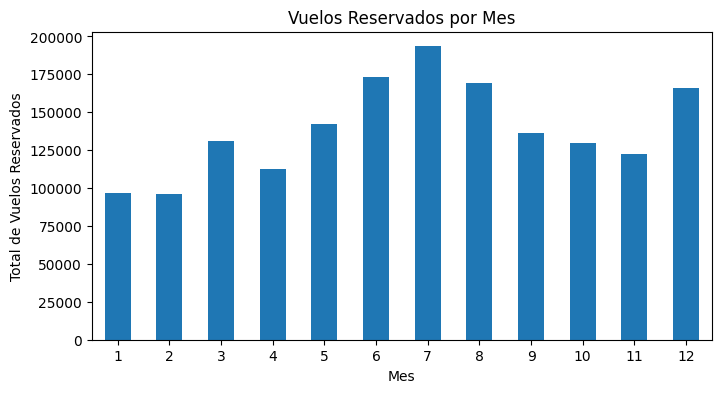

In [3]:
df.groupby('Month')['Flights Booked'].sum().plot(kind='bar', figsize=(8,4))

plt.title('Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Vuelos Reservados')
plt.xticks(rotation=0)
plt.show()


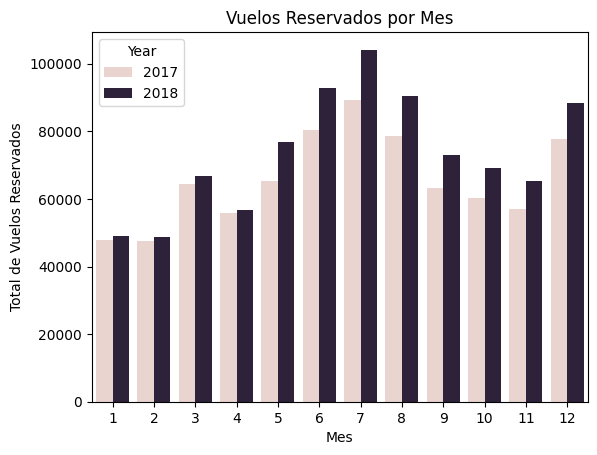

In [4]:
# Agrupar por Año y Mes, sumando vuelos reservados
grouped = df.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Graficar usando seaborn con 'Year' como hue
sns.barplot(data=grouped, x='Month', y='Flights Booked', hue='Year')

plt.title('Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Vuelos Reservados')
plt.xticks(rotation=0)
plt.savefig('images/relacion_totalvuelos_mes.png')  # Guarda la imagen aquí.
plt.show()

En la siguiente gráfica veríamos distribución, es decir, cómo se comportan los clientes en cada mes, no solo la suma total de vuelos reservados como en el anterior:

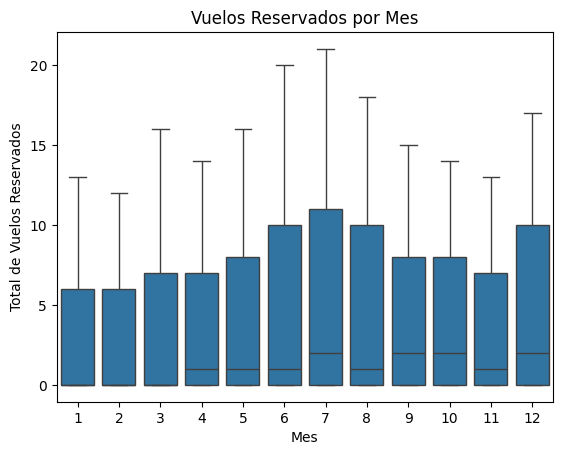

In [5]:
sns.boxplot(data=df, x='Month', y='Flights Booked')
plt.title('Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Vuelos Reservados');

Interpretación de la gráfica:

La gráfica muestra el total de vuelos reservados por los clientes en cada mes del año (1-12). Se observa que:
- La demanda de vuelos no es constante a lo largo del año.
- Los meses con mayor número de vuelos reservados destacan (junio, julio, agosto y diciembre), lo que podría reflejar temporadas altas asociadas a vacaciones.
- Los meses con menor volumen pueden corresponder a temporadas bajas (enero, febrero, marzo, abril, noviembre).

Esta visualización permite identificar patrones estacionales en las reservas de vuelo, información útil para tomar decisiones relacionadas con la planificación operativa, marketing, análisis de comportamiento de clientes, etc.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

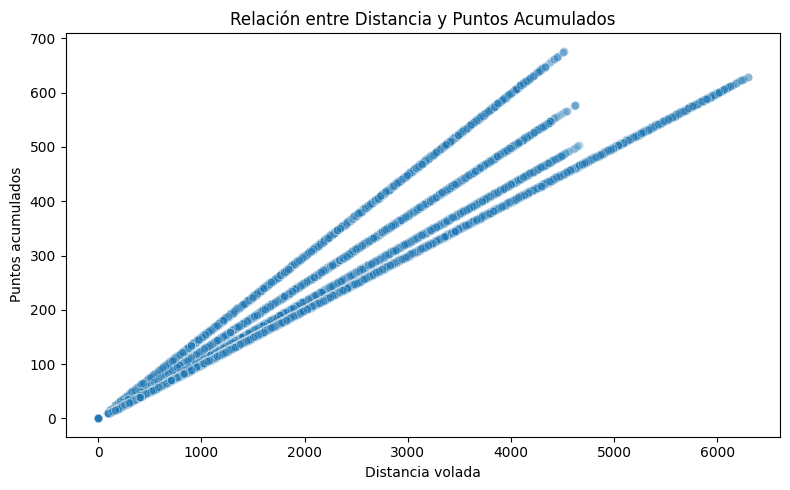

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Distance', y='Points Accumulated', alpha=0.3)
# Cuando hay muchos puntos en la gráfica y se superponen, usar un alpha bajo (como 0.3) hace que los puntos se vean más transparentes, 
# facilitando ver dónde hay mayor concentración (las zonas más oscuras).
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre Distancia y Puntos Acumulados")
plt.tight_layout()  # Ajusta automáticamente los espacios entre los elementos de la figura para que no se corten o superpongan.
plt.show()

Analizando el scatterplot (gráfico de dispersión que muestra si hay correlación positiva, negativa o ninguna entre variables numéricas), podemos observar claramente 4 líneas de correlación positiva entre 'Puntos acumulados' y 'Distancia volada'.

Por lo tanto, para entender qué variable está relacionada con la división clara de líneas, se valoran diversas opciones aplicándolas como hue en la misma gráfica. Se consideran que las siguientes podrían afectar directamente a cómo se acumulan los puntos en función de la distancia:
- Loyalty Card
- Enrollment Year
- Flights with Companions
- Education
- Marital Status

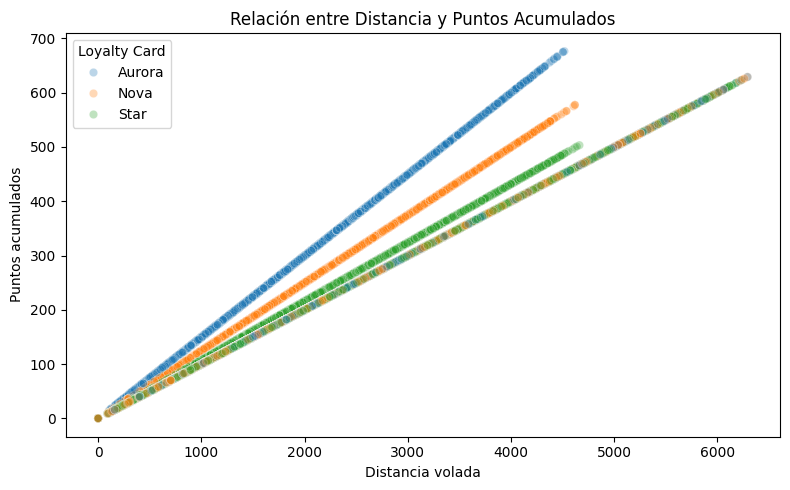

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Distance', y='Points Accumulated', hue='Loyalty Card', alpha=0.3)
# Cuando hay muchos puntos en la gráfica y se superponen, usar un alpha bajo (como 0.3) hace que los puntos se vean más transparentes, 
# facilitando ver dónde hay mayor concentración (las zonas más oscuras).
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre Distancia y Puntos Acumulados")
plt.tight_layout()  # Ajusta automáticamente los espacios entre los elementos de la figura para que no se corten o superpongan.
plt.savefig('images/relacion_distancia_puntos.png')  # Guarda la imagen aquí.
plt.show()

Claramente, la variable 'Loyalty Card' es la que encaja, por lo que se podría decir que distintos tipos de tarjetas tienen reglas o beneficios diferentes que generan esas líneas.

- Aurora acumula puntos de forma mucho más rápida por cada unidad de distancia volada (pendiente mayor).
- Nova acumula puntos más lentamente que Aurora pero más rápidamente que Star.
- Star sería la opción de las 3 tarjetas que acumula puntos más lentamente.
- Para terminar, la línea más baja y menos definida podría ser un grupo residual o mezcla de clientes que acumulan puntos de manera más baja o irregular. Next steps: Analizar el origen de esta 4a línea.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

Como ya habíamos visto en la Fase 1 de análisis:

--------------------------------------------------------------------------

📊 Exploración categórica de 'Province':
 - Moda: Ontario
 - Cardinalidad (nº de categorías distintas): 11
--------------------------------------------------------------------------


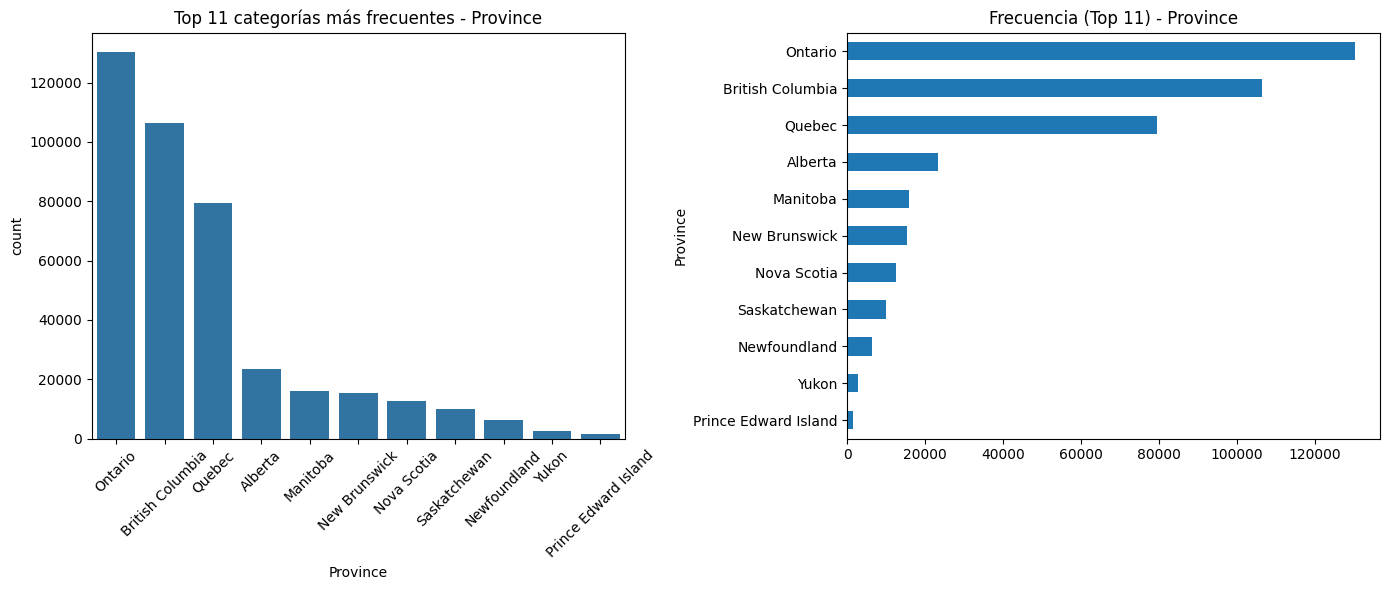

{'moda': 'Ontario',
 'cardinalidad': 11,
 'frecuencias_abs': Province
 Ontario                 130258
 British Columbia        106442
 Quebec                   79573
 Alberta                  23360
 Manitoba                 15900
 New Brunswick            15352
 Nova Scotia              12507
 Saskatchewan              9861
 Newfoundland              6244
 Yukon                     2679
 Prince Edward Island      1584
 Name: count, dtype: int64,
 'frecuencias_rel': Province
 Ontario                 32.26
 British Columbia        26.36
 Quebec                  19.71
 Alberta                  5.79
 Manitoba                 3.94
 New Brunswick            3.80
 Nova Scotia              3.10
 Saskatchewan             2.44
 Newfoundland             1.55
 Yukon                    0.66
 Prince Edward Island     0.39
 Name: proportion, dtype: float64,
 'categorias_raras': None}

In [8]:
sp_eda.exploracion_cat(df,'Province', graficos=True, mostrar_tablas=False, top=11, detectar_raras=False)
# Province: Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).

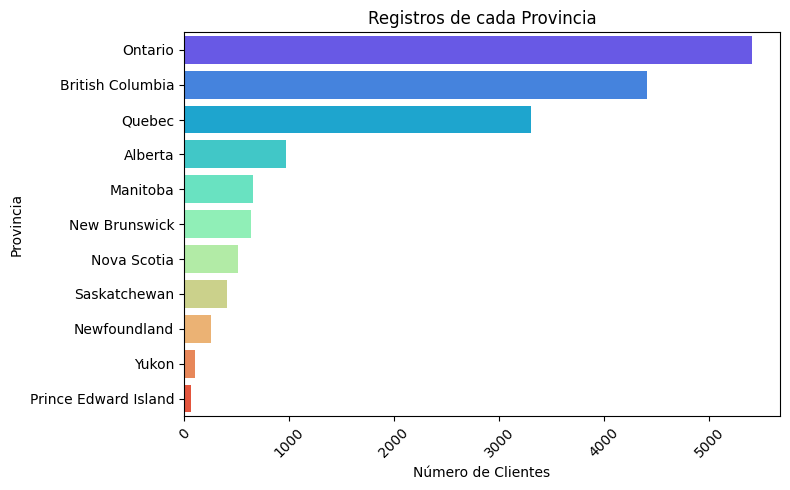

In [9]:
# Agrupar por provincia y contar clientes únicos
clientes_por_provincia = df.groupby('Province')['Loyalty Number'].nunique().sort_values(ascending=False)

# Convertir a DataFrame para manipulación y gráficos
df_prov = clientes_por_provincia.reset_index(name='NumClientes')

# Visualización: provincias
plt.figure(figsize=(8,5))
sns.barplot(data=df_prov.head(11), y='Province', x='NumClientes', palette='rainbow')
plt.xticks(rotation=45)
plt.title('Registros de cada Provincia')
plt.ylabel('Provincia')
plt.xlabel('Número de Clientes')
plt.tight_layout()
plt.show();

# El barplot necesita un DataFrame que tenga los valores numéricos que queremos graficar, como sumas y conteos.
# El gráfico muestra el valor numérico que le damos para cada categoría.

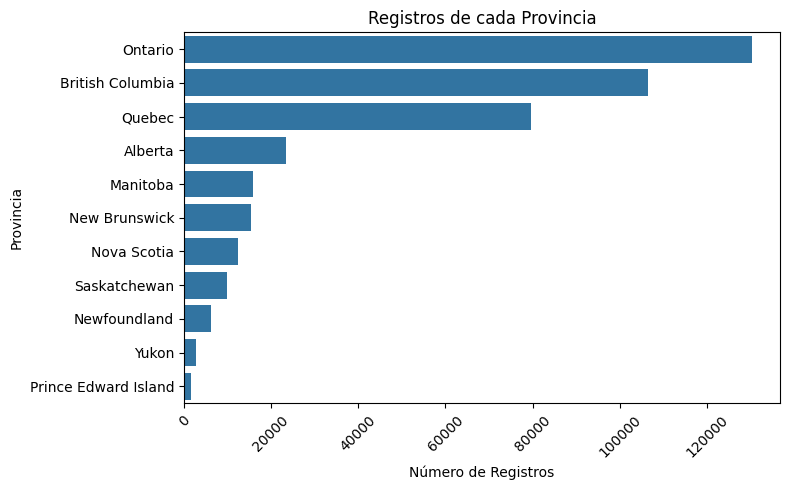

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Province', order=df['Province'].value_counts().iloc[:11].index)
plt.xticks(rotation=45)
plt.title('Registros de cada Provincia')
plt.ylabel('Provincia')
plt.xlabel('Número de Registros')
plt.tight_layout()
plt.show()

# countplot — Cuenta registros en una columna categórica, solo necesita el DataFrame y la columna categórica. 
# El gráfico muestra cuántas filas hay por categoría, sin necesidad de hacer cálculos previos.

- Ontario es la provincia con más clientes, con 130,258 registros.

- Le sigue British Columbia con 106,442 clientes.

- Luego está Quebec con 79,573 clientes.

- Provincias como Alberta, Manitoba y New Brunswick tienen cantidades menores, pero aún significativas (entre 15,000 y 23,000).

- Otras provincias como Nova Scotia, Saskatchewan, Newfoundland, Yukon y Prince Edward Island tienen menos clientes, con cifras que van desde alrededor de 1,500 hasta poco menos de 13,000.

En términos porcentuales, Ontario, British Columbia y Quebec concentran la mayor parte de la clientela, mostrando una clara concentración geográfica.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [11]:
salario_promedio = df.groupby('Education')['Salary'].mean().sort_values()
print(salario_promedio)

Education
High School or Below     61146.378165
College                  66937.500000
Bachelor                 72599.080913
Master                  103734.523724
Doctor                  178403.675202
Name: Salary, dtype: float64


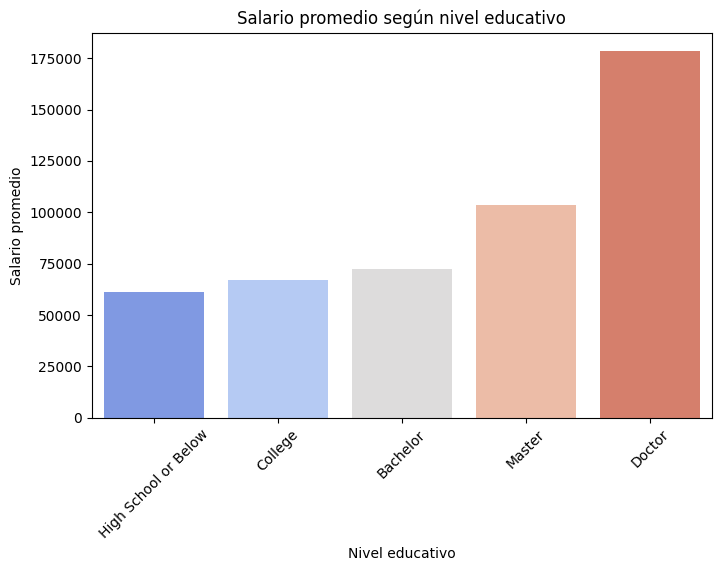

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=salario_promedio.index, y=salario_promedio.values, palette="coolwarm")
plt.title('Salario promedio según nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.savefig('images/relacion_salariopromedio_educacion.png')  # Guarda la imagen aquí.
plt.show()

- Tendencia clara: A medida que aumenta el nivel educativo, también lo hace el salario promedio. Esto es consistente con la teoría y estudios laborales habituales.

- Salario imputado para College: Hay que recordar que el salario para College fue imputado (por ausencia de datos reales) y está justo entre High School or Below y Bachelor, lo que tiene sentido considerando que el nivel educativo College se sitúa entre esos dos.

- Gran salto en Doctorado: El salario promedio para la categoría Doctor es significativamente mayor, lo que refleja el alto valor que suele tener un doctorado en términos salariales.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

- Cada cliente tiene un tipo de Loyalty Card (Star, Nova, Aurora).

- Al contar cuántos clientes hay en cada categoría y convertirlo a porcentaje, podemos ver qué tan común o popular es cada tipo de tarjeta.

- Esto nos da una idea clara de la composición del programa de lealtad en términos de participación por tipo de tarjeta.

In [13]:
# Contar cuántos clientes hay por tipo de tarjeta
conteo_tarjetas = df['Loyalty Card'].value_counts(normalize=True) * 100  # En porcentaje
print(conteo_tarjetas)

Loyalty Card
Star      45.508470
Nova      33.902071
Aurora    20.589459
Name: proportion, dtype: float64


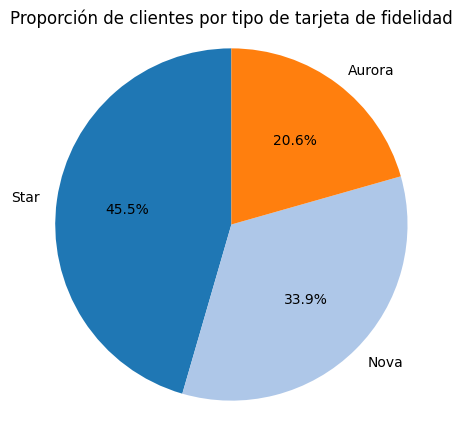

In [14]:
labels = conteo_tarjetas.index
sizes = conteo_tarjetas.values

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.axis('equal')  # Para que el pie sea circular
plt.show()


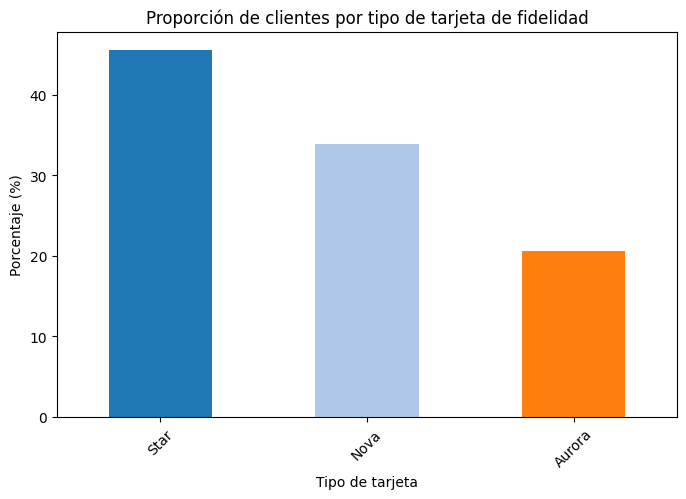

In [15]:
plt.figure(figsize=(8, 5))
conteo_tarjetas.plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Tipo de tarjeta')
plt.xticks(rotation=45)
plt.show()

- Star: Es la categoría con mayor proporción de clientes, representando aproximadamente el 45.5% del total. Esto indica que casi la mitad de los clientes están inscritos en este nivel del programa de lealtad.

- Nova: Ocupa la segunda posición con un 33.9% de los clientes. Aunque es menor que Star, sigue siendo una parte importante de la base de clientes.

- Aurora: Representa el 20.6% restante, siendo el nivel con menor proporción de clientes dentro del programa.

Esta distribución sugiere que la mayoría de los clientes se encuentran en los niveles intermedios (Star y Nova), mientras que Aurora representa un grupo más pequeño. Esta información puede ayudar a enfocar estrategias de marketing y promociones específicas según el nivel de fidelidad de los clientes.

Como Next Step, se podría analizar si tienen relación los outliers que habíamos visto en la Fase 1 de clientes que realizan muchas reservas de vuelos/ recorren mucha distancia de vuelos con la tarjeta de fidelidad Aurora.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

Podemos ver estos datos de diferentes maneras, pero llegando a las mismas conclusiones:
- No hay diferencias notables entre géneros.
- Aproximadamente un 15% son divorciadas/os, un 58% son casadas/os y un 27% solteras/os.
- Para la campaña de filiación al programa, se podría enfocar la campaña de marketing en clientes casados.

In [16]:
pd.crosstab(df['Marital Status'], df['Gender'])

Gender,Female,Male
Marital Status,,
Divorced,30634,30128
Married,117363,117482
Single,54760,53393


- Hay 30,634 mujeres divorciadas y 30,128 hombres divorciados.

- La categoría más grande es la gente casada, con casi el mismo número de hombres (117,482) y mujeres (117,363).

- El grupo de solteros también es equilibrado, con alrededor de 54,760 mujeres y 53,393 hombres.

In [17]:
round(pd.crosstab(df['Marital Status'], df['Gender'], normalize='index') * 100,2)
# Se calcula el porcentaje por fila (es decir, para cada estado civil, qué porcentaje corresponde a cada género).

Gender,Female,Male
Marital Status,,
Divorced,50.42,49.58
Married,49.97,50.03
Single,50.63,49.37


- Entre los Divorciados, el 50.42% son mujeres y el 49.58% son hombres.

- Entre los Casados, el 49.97% son mujeres y el 50.03% son hombres.

- Entre los Solteros, el 50.63% son mujeres y el 49.37% son hombres.

In [18]:
round(pd.crosstab(df['Marital Status'], df['Gender'], normalize='columns') * 100,2)
# Se calcula el porcentaje por columna (es decir, para cada género, qué porcentaje corresponde a cada estado civil).

Gender,Female,Male
Marital Status,,
Divorced,15.11,14.99
Married,57.88,58.45
Single,27.01,26.56


- El 15.11% del total son mujeres divorciadas, el 14.99% del total son hombres divorciados.

- El 57.88% del total son mujeres casadas, el 58.45% del total son hombres casados.

- El 27.01% del total son mujeres solteras, el 26.56% del total son hombres solteros.